In [1]:
# Objective: 
# The objective of this assignment is to implement and evaluate the 
# K-Nearest Neighbours algorithm for classification using the given datasets

In [2]:
# Load the necessary python libraries

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset

df=pd.read_csv("zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
# Exploratory data analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.shape

(101, 18)

In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
df.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [9]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [10]:
df.isnull().sum()

# No null values

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\2147826777.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hair'])


<Axes: xlabel='hair', ylabel='Density'>

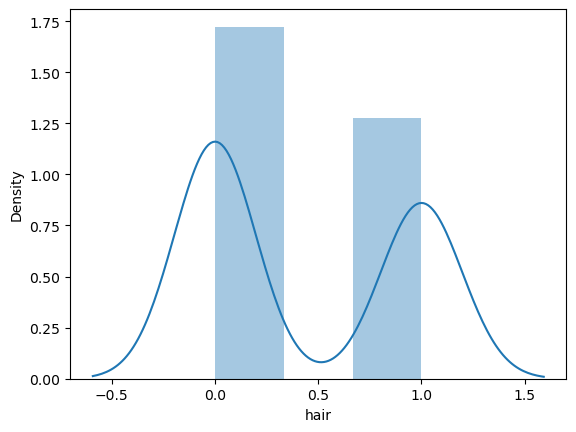

In [11]:
# Visualizations

sns.distplot(df['hair'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\1505446496.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['feathers'])


<Axes: xlabel='feathers', ylabel='Density'>

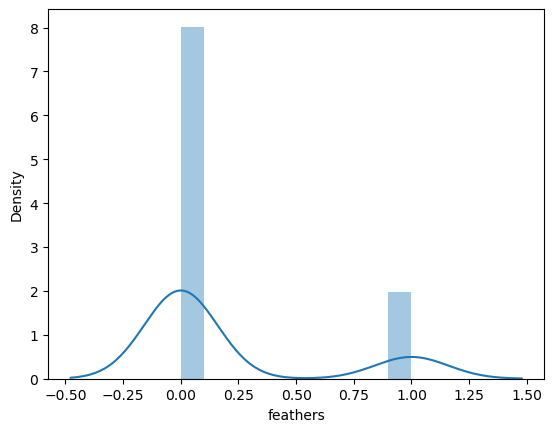

In [12]:
sns.distplot(df['feathers'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\2343771853.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['eggs'])


<Axes: xlabel='eggs', ylabel='Density'>

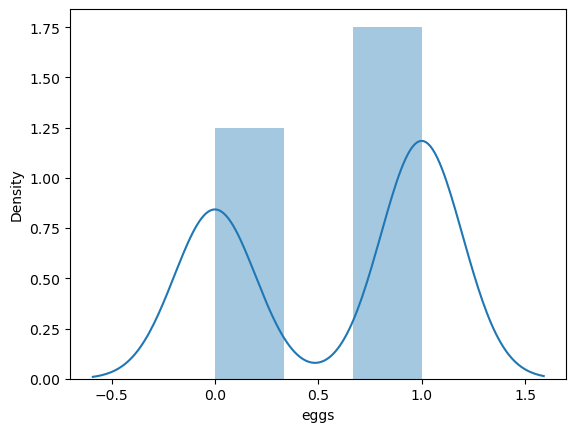

In [13]:
sns.distplot(df['eggs'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\621159544.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['milk'])


<Axes: xlabel='milk', ylabel='Density'>

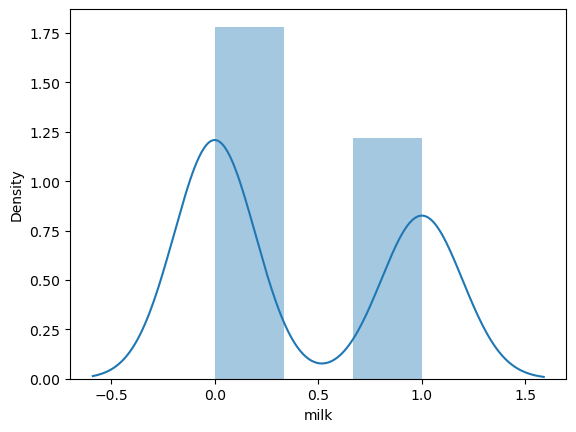

In [14]:
sns.distplot(df['milk'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\2142239146.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['airborne'])


<Axes: xlabel='airborne', ylabel='Density'>

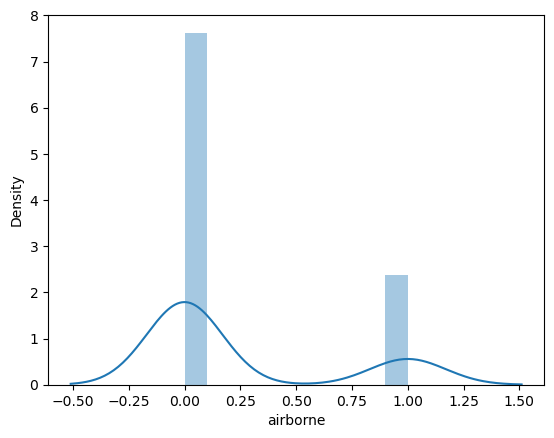

In [15]:
sns.distplot(df['airborne'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\1454384895.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['aquatic'])


<Axes: xlabel='aquatic', ylabel='Density'>

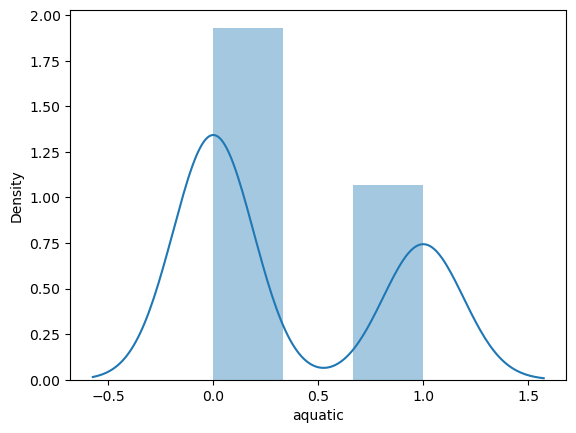

In [16]:
sns.distplot(df['aquatic'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\2023991200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['predator'])


<Axes: xlabel='predator', ylabel='Density'>

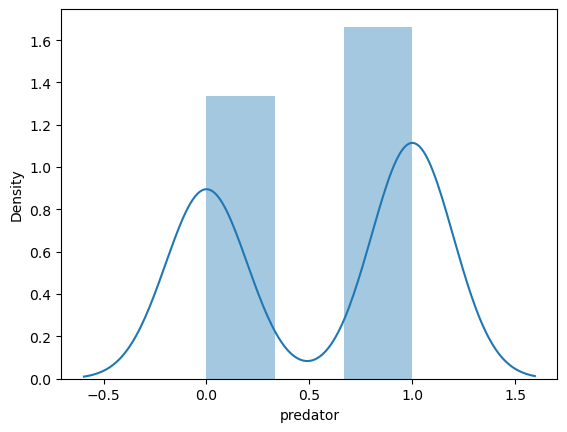

In [17]:
sns.distplot(df['predator'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\3943886911.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['toothed'])


<Axes: xlabel='toothed', ylabel='Density'>

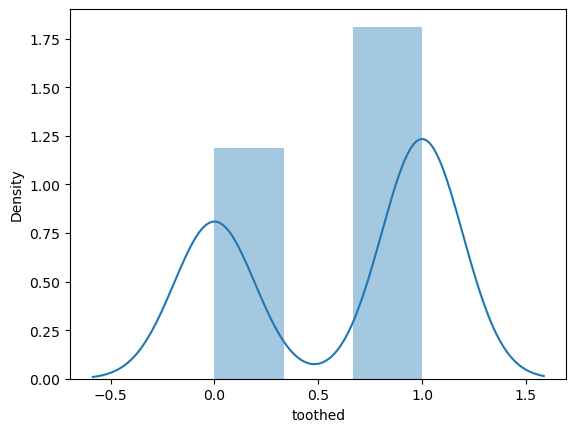

In [18]:
sns.distplot(df['toothed'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\1103813103.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['backbone'])


<Axes: xlabel='backbone', ylabel='Density'>

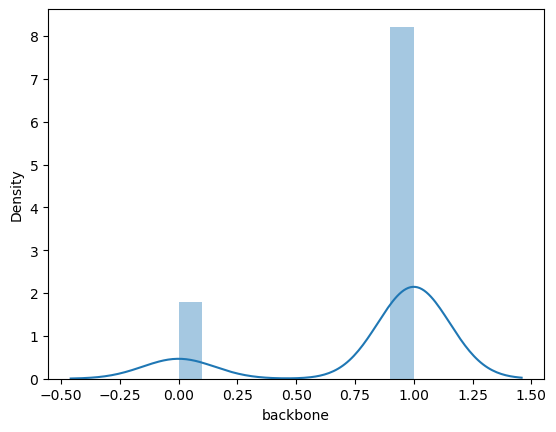

In [19]:
sns.distplot(df['backbone'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\3055453462.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['breathes'])


<Axes: xlabel='breathes', ylabel='Density'>

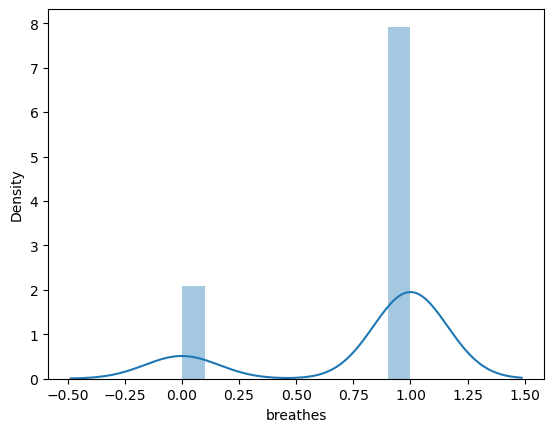

In [20]:
sns.distplot(df['breathes'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\2887444918.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['venomous'])


<Axes: xlabel='venomous', ylabel='Density'>

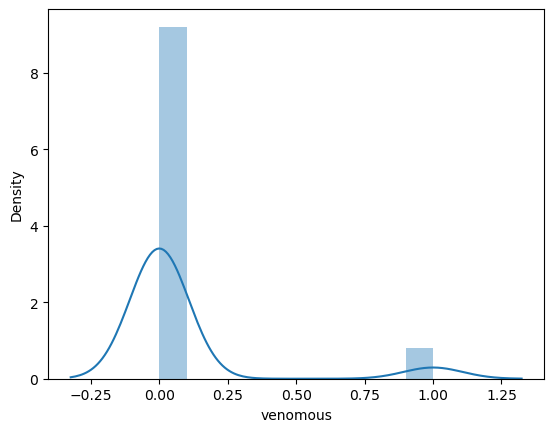

In [21]:
sns.distplot(df['venomous'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\4233300661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fins'])


<Axes: xlabel='fins', ylabel='Density'>

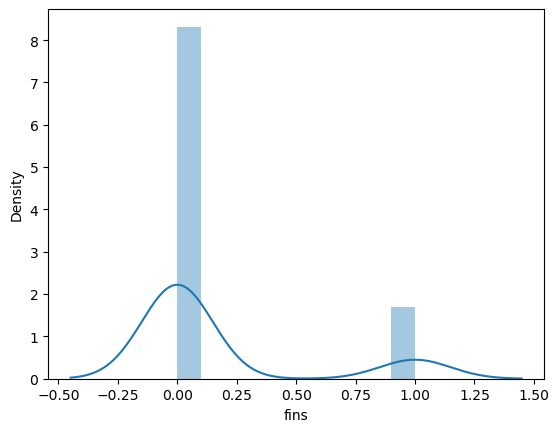

In [22]:
sns.distplot(df['fins'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\3292189164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['legs'])


<Axes: xlabel='legs', ylabel='Density'>

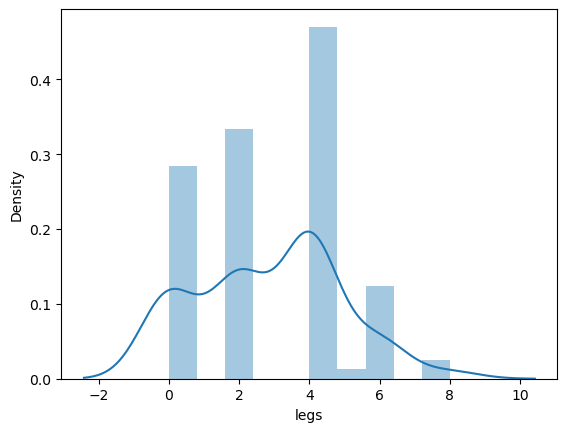

In [23]:
sns.distplot(df['legs'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\913298653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tail'])


<Axes: xlabel='tail', ylabel='Density'>

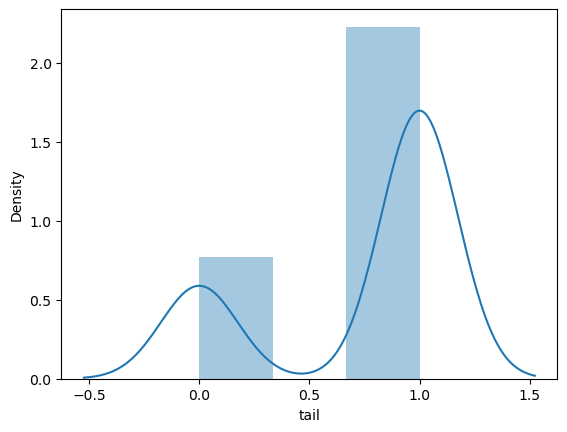

In [24]:
sns.distplot(df['tail'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\1836685593.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['domestic'])


<Axes: xlabel='domestic', ylabel='Density'>

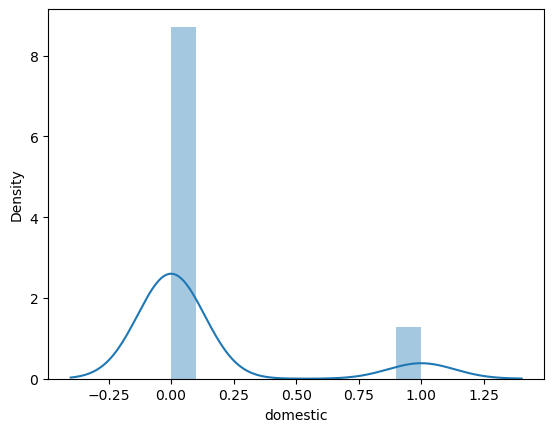

In [25]:
sns.distplot(df['domestic'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\1724242138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['catsize'])


<Axes: xlabel='catsize', ylabel='Density'>

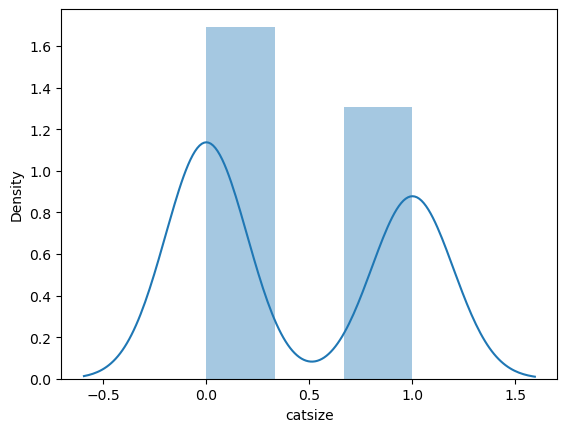

In [26]:
sns.distplot(df['catsize'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_14320\364590236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['type'])


<Axes: xlabel='type', ylabel='Density'>

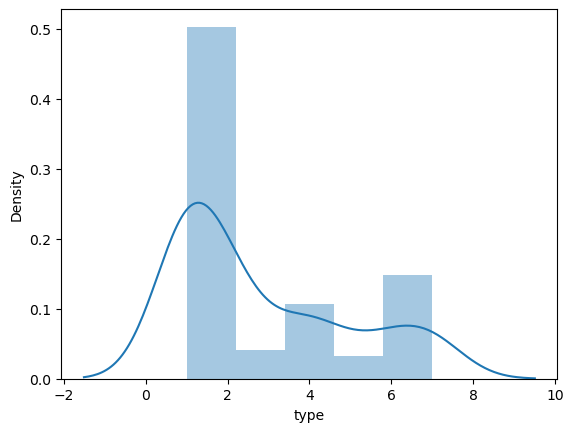

In [27]:
sns.distplot(df['type'])

In [28]:
# Feature extraction
# Let's create numpy arrays for features and target
X = df.drop(columns = ['animal name','type'],axis=1).values
y = df['type'].values

In [29]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [30]:
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [31]:
# importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60, 16), (41, 16), (60,), (41,))

In [33]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [35]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    train_accuracy[i]

In [36]:
# Accuracy on training set
train_accuracy

array([1.        , 0.98333333, 0.95      , 0.93333333, 0.9       ,
       0.83333333, 0.78333333, 0.78333333])

In [37]:
test_accuracy

array([0.97560976, 0.95121951, 0.95121951, 0.87804878, 0.87804878,
       0.82926829, 0.82926829, 0.82926829])

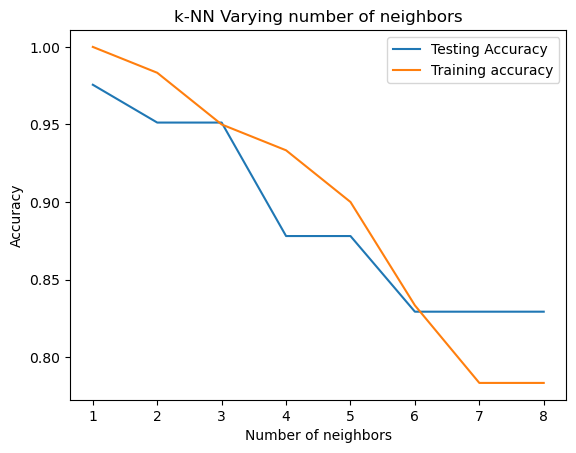

In [38]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [39]:
pred = knn.predict(X_test)
pred

array([4, 1, 2, 7, 2, 1, 4, 1, 2, 1, 1, 1, 1, 4, 4, 1, 1, 4, 6, 1, 1, 1,
       2, 6, 1, 1, 2, 2, 6, 1, 1, 4, 2, 1, 4, 1, 6, 4, 1, 4, 2],
      dtype=int64)

In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[17  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 2  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  2  0  1  1]]


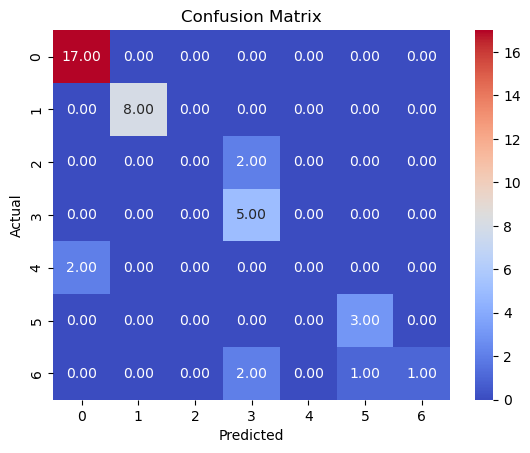

In [41]:
# Visualize the confusion matrix

conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        17
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         2
           4       0.56      1.00      0.71         5
           5       0.00      0.00      0.00         2
           6       0.75      1.00      0.86         3
           7       1.00      0.25      0.40         4

    accuracy                           0.83        41
   macro avg       0.60      0.61      0.56        41
weighted avg       0.79      0.83      0.78        41



C:\Users\mihir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.model_selection import cross_val_score

print('Training accuracy {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(knn.score(X_test,y_test)))
score = cross_val_score(knn,X,y)
print("Score:",score)
print("CV Score:",np.mean(score))

Training accuracy 0.7833
Testing accuracy 0.8293
Score: [0.85714286 0.8        0.85       0.75       0.75      ]
CV Score: 0.8014285714285714


C:\Users\mihir\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [44]:
# The value of K in KNN algorithm is related to the error of the model
# A small value could lead to overfitting problem
# Higher the value better is the model, lower the value it is ok
# If input has more outliers or noise, it is better to choose higher value of K

In [45]:
# Interview Questions:

# 1. What are the key hyperparameters in KNN?

# The number of neighbors to inspect in a KNN model is a hyperparameter. 
# It is specified when you create the model. 
# The table of actual nearest neighbors in a KNN model is a parameter. 
# It is computed when you train the model.

In [46]:
# 2. What distance metrics can be used in KNN?

# Minkowski Distance: 
# It is a metric intended for real-valued vector spaces. 
# We can calculate Minkowski distance only in a normed vector space, which means in a space where 
# distances can be represented as a vector that has a length and the lengths cannot be negative.

# Manhattan Distance: 
# This distance is also known as taxicab distance or city block distance, that is because the way 
# this distance is calculated. 
# The distance between two points is the sum of the absolute differences of their 
# Cartesian coordinates.

# Euclidean Distance: 
# This distance is the most widely used one as it is the default metric that SKlearn library of Python
# uses for K-Nearest Neighbour. It is a measure of the true straight line distance between 
# two points in Euclidean space.

# Cosine Distance: 
# This distance metric is used mainly to calculate similarity between two vectors. 
# It is measured by the cosine of the angle between two vectors and determines whether two vectors 
# are pointing in the same direction. 
# It is often used to measure document similarity in text analysis. 
# When used with KNN this distance gives us a new perspective to a business problem and lets us 
# find some hidden information in the data which we didn’t see using the above two distance matrices.

# Jaccard Distance: 
# The Jaccard coefficient is a similar method of comparison to the Cosine Similarity due to how 
# both methods compare one type of attribute distributed among all data.  
# The Jaccard approach looks at the two data sets and finds the incident where both values are equal 
# to 1.  So the resulting value reflects how many 1 to 1 matches occur in comparison to the 
# total number of data points.

# Hamming Distance: 
# Hamming distance is a metric for comparing two binary data strings. 
# While comparing two binary strings of equal length, Hamming distance is the number of bit 
# positions in which the two bits are different. 
# The Hamming distance method looks at the whole data and finds when data points are similar and 
# dissimilar one to one.  
# The Hamming distance gives the result of how many attributes were different.